In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest


def fix_scores(scores):
    true_scores = scores[::2]
    reverse_scores = true_scores[::-1]

    final_scores = np.sum([true_scores, reverse_scores], axis=0)
    return final_scores

df = pd.read_csv('./simulation_long_tiago.csv')
df['scores'] = df['scores'].apply(eval)

df['normality'] = df['scores'].apply(normaltest)


(0.0, 46.0)

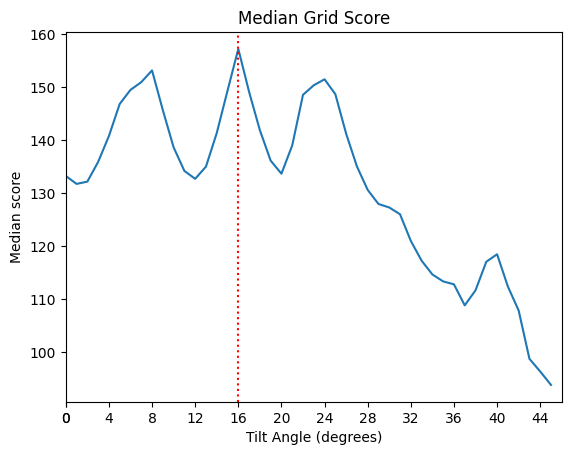

In [2]:
plt.figure()

plt.title('Median Grid Score')

plt.plot(df['angle'], df['median'])
plt.axvline(x=16, color='red', linestyle="dotted")

plt.xlabel('Tilt Angle (degrees)')
plt.ylabel('Median score')
plt.xticks([0] + list(range(0, 48, 4)))
plt.xlim(0, 46)



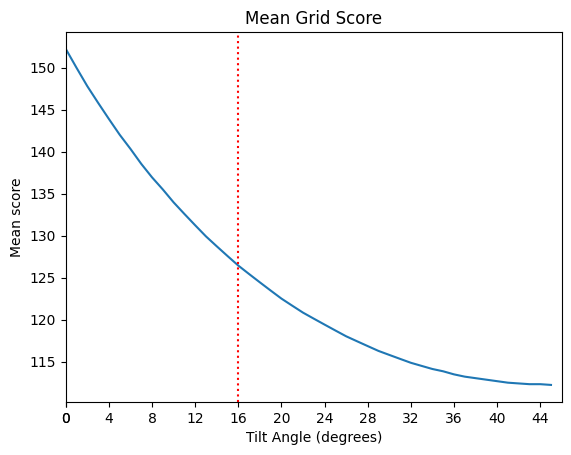

In [3]:

plt.figure()
plt.title('Mean Grid Score')

plt.plot(df['angle'], df['mean'])
plt.axvline(x=16, color='red', linestyle="dotted")

plt.xlabel('Tilt Angle (degrees)')
plt.ylabel('Mean score')
plt.xticks([0] + list(range(0, 48, 4)))
plt.xlim(0, 46)
plt.show()

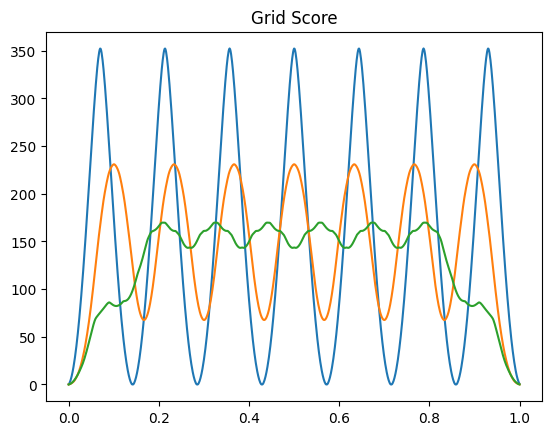

In [16]:
filtered_angle = df[df["angle"].isin([0, 5, 15])]


plt.figure()
plt.title('Grid Score')


for idx, items in filtered_angle.iterrows():
    y_values = items["scores"]
    x_values = np.linspace(0,  1, num=len(y_values), endpoint=True)

    plt.plot(x_values, y_values)

plt.show()



In [17]:
from particle import decay

scorer = decay(0.49 + 0.04)

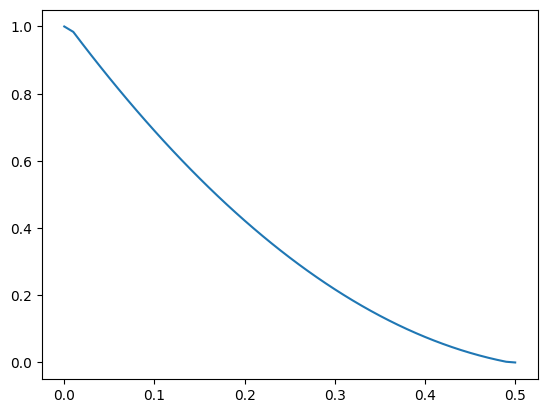

In [25]:
x_values = np.arange(start=0, stop=0.51, step=0.01)
y_values = [scorer(x) for x in x_values]

plt.figure()
plt.plot(x_values, y_values)
plt.show()